## Numerical Loan Approval Dataset

### 1. Setup and Imports

In [35]:
# Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, mean_squared_error

# Configure visual settings
sns.set_style('whitegrid')
%matplotlib inline

### 2. Data Loading & EDA(Exploratory Data Analysis.)

In [36]:
# Load the dataset
# '..' means go up one level, then into 'dataset' folder
df = pd.read_csv('../dataset/bank_loan.csv')

# 1. Check the size of the dataset
print(f"Dataset Shape: {df.shape}")  # (Rows, Columns)

# 2. Look at the first 5 rows to understand what the data looks like
display(df.head(10))

# 3. Check data types and missing values
print("\n--- Data Info ---")
df.info()

# 4. Check for missing values in each column
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

Dataset Shape: (5000, 14)


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

--- Missing Values Count ---
ID     

### 3. Data Preprocessing (Cleaning)

In [37]:
# 1. Drop useless columns
# ID is just an index, and ZIP Code is too messy for simple regression
df.drop(['ID', 'ZIP.Code'], axis=1, inplace=True)

# 2. Check for negative experience
print(f"Negative Experience Count: {(df['Experience'] < 0).sum()}")

# 3. Fix Negative Experience
# We convert negative values to positive (assuming it was a typo)
df['Experience'] = df['Experience'].abs()

# 4. Verify no missing values exist (Just to be safe)
print("Missing values:", df.isnull().sum().sum())

Negative Experience Count: 52
Missing values: 0


### 4. Feature Engineering & Scaling

In [38]:
# --- Cell: Feature Engineering & Scaling ---
from sklearn.preprocessing import LabelEncoder

# 1. Encoding 'Education' using LabelEncoder
# This converts categories (1, 2, 3) into (0, 1, 2)
# preserving the order: Undergrad < Graduate < Professional
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

# 2. Define Features (X) and Target (y)
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

# 3. Feature Scaling (Mandatory for KNN)
# This forces all columns (Income, Mortgage, etc.) onto the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split Data into Training and Testing
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Setup Complete!")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Data Setup Complete!
Training Shape: (4000, 11)
Testing Shape: (1000, 11)


### 5. Model 1: Linear Regression

Linear Regression Accuracy: 92.50%


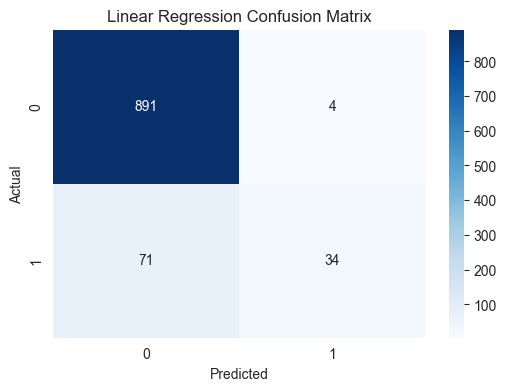

In [49]:
# --- Linear Regression Implementation ---
# 1. Train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 2. Predict (Continuous values)
y_pred_lin = lin_reg.predict(X_test)

# 3. Convert to Class (0 or 1)
# Threshold: If prediction > 0.5, we classify as 1 (Loan Approved)
y_pred_class_lin = [1 if val > 0.5 else 0 for val in y_pred_lin]

# 4. Results
print(f"Linear Regression Accuracy: {accuracy_score(y_test, y_pred_class_lin):.2%}")

# 5. Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_class_lin), annot=True, fmt='d', cmap='Blues')
plt.title('Linear Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
#Interpretation of Your Confusion Matrix:

#True Negatives (891): The model correctly identified 891 customers who did not accept the personal loan. It is extremely good at this.

#False Positives (4): The model only made 4 mistakes where it predicted someone would take the loan, but they didn't. This means your model has very high Precision—when it predicts "Yes," it is almost always right.

#False Negatives (71): The model missed 71 people who actually accepted the loan (predicting they wouldn't). This is the model's weak point; it is a bit "conservative" and misses some potential customers.

#True Positives (34): It correctly found 34 customers who accepted the loan.

#### Saving Linear Regression Predictions to predistions.csv

In [50]:
# --- Save Predictions to CSV ---

# 1. Create a DataFrame with Actual vs. Predicted values
# y_test: The actual answers (0 or 1)
# y_pred_class_lin: The 0 or 1 prediction
# y_pred_lin: The raw score (e.g., 0.85) - Optional but useful to see "confidence"
results_df = pd.DataFrame({
    'Actual_Status': y_test,
    'Predicted_Status': y_pred_class_lin,
    'Prediction_Score': y_pred_lin
})

# 2. Save it to the specific folder structure
# index=False ensures we don't save the row numbers as a separate column
results_df.to_csv('../results/linear_regression/LR_predictions.csv', index=False)

print("Successfully saved LR_predictions.csv!")
print(results_df.head()) # Show the first few rows to verify

Successfully saved LR_predictions.csv!
      Actual_Status  Predicted_Status  Prediction_Score
1501              0                 0         -0.153096
2586              1                 0          0.313293
2653              0                 0          0.174442
1055              0                 0         -0.147722
705               0                 0         -0.026343


### 6. Model 2: K-Nearest Neighbors (KNN)

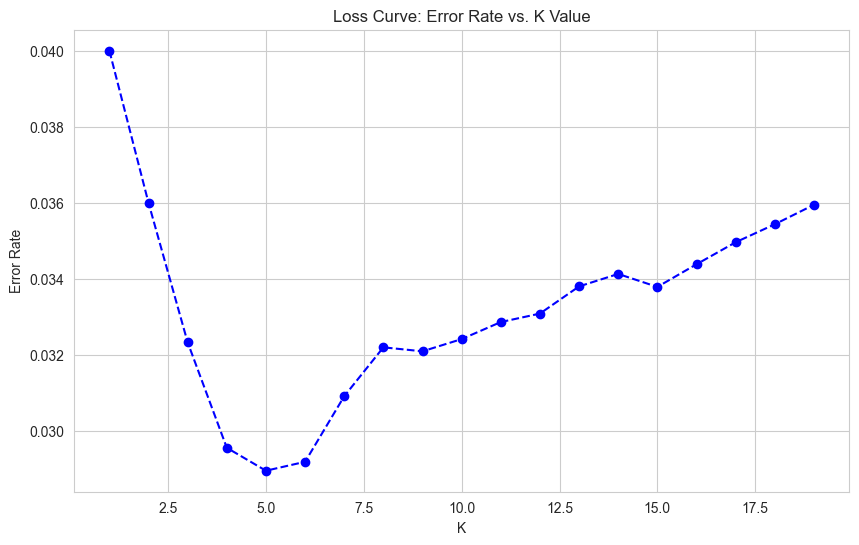

Best K found: 5
KNN Accuracy: 96.10%


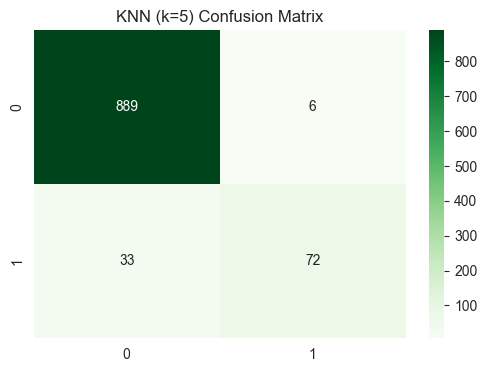

In [51]:
# --- KNN Implementation & Tuning ---
# 1. Hyperparameter Tuning (Finding the best K)
error_rate = []
k_range = range(1, 20)

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Calculate MSE (Mean Squared Error) for the Loss Curve
    error_rate.append(np.mean((pred_i - y_test) ** 2))

# 2. Plot the Loss Curve (Required Deliverable)
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Loss Curve: Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# 3. Train Final Model with Best K (e.g., K=5 or lowest point on graph)
best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K found: {best_k}")

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
y_pred_class_knn = [1 if val > 0.5 else 0 for val in y_pred_knn]

# 4. Final KNN Results
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_class_knn):.2%}")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_class_knn), annot=True, fmt='d', cmap='Greens')
plt.title(f'KNN (k={best_k}) Confusion Matrix')
plt.show()

In [43]:
#Metric	              Linear             Regression KNN (K=5)	      Improvement
#Accuracy	        92.50%	             96.10%	                  +3.6%
#True Positives     (Caught the Loan)	 34	72	                  Doubled! (Huge Win)
#False Negatives    (Missed the Loan)	 71	33	                  Halved! (Huge Win)
#False Positives    (False Alarm)	     4	6	                  Slight increase (Negligible)

#Conclusion: KNN is much better at actually finding the people who accepted loans (Sensitivity/Recall), 
#which is the most important business metric here.

#### Saving KNN (K-Nearest Neighbors) Predictions to predistions.csv

In [53]:
# --- Save KNN Predictions to CSV ---

# 1. Create a DataFrame
# y_test: Actual values
# y_pred_class_knn: The 0/1 prediction from your best K model
# y_pred_knn: The raw average score from neighbors (e.g., 0.6, 0.8)
results_knn_df = pd.DataFrame({
    'Actual_Status': y_test,
    'Predicted_Status': y_pred_class_knn,
    'Prediction_Score': y_pred_knn
})

# 2. Save to the KNN results folder
results_knn_df.to_csv('../results/KNN/KNN_predictions.csv', index=False)

print("Successfully saved KNN KNN_predictions.csv!")
print(results_knn_df.head())

Successfully saved KNN KNN_predictions.csv!
      Actual_Status  Predicted_Status  Prediction_Score
1501              0                 0               0.0
2586              1                 1               0.8
2653              0                 0               0.2
1055              0                 0               0.0
705               0                 0               0.0


In [48]:
# prediction.csv Column Breakdown

#Actual_Status: The truth (0 = No Loan, 1 = Accepted Loan).

#Predicted_Status: The final decision your model made (0 or 1).

#Prediction_Score: The "vote" confidence.

#If Score > 0.5 (i.e., 0.6, 0.8, 1.0), the model predicts 1.

#If Score ≤ 0.5 (i.e., 0.0, 0.2, 0.4), the model predicts 0.

### 7. Final Results: ROC Curve Comparison

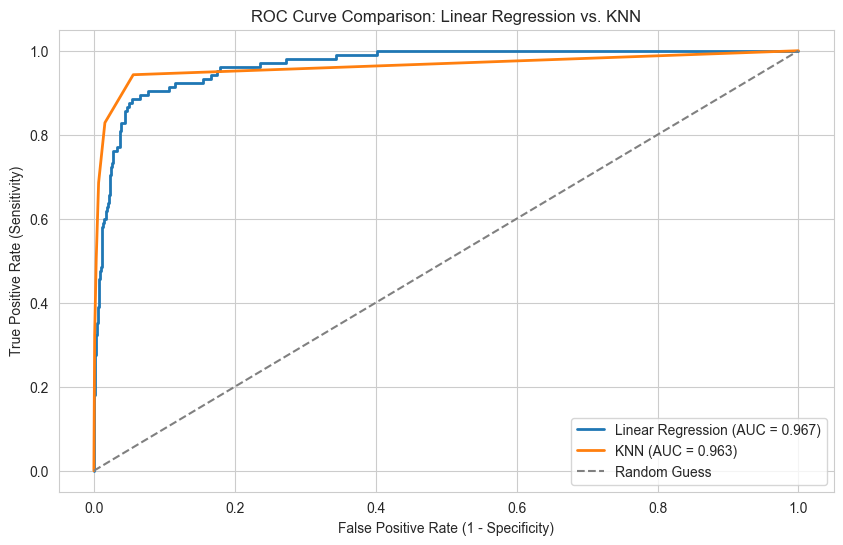

In [46]:
# --- ROC Curve Comparison ---
from sklearn.metrics import roc_curve, auc

# 1. Calculate ROC Metrics for Linear Regression
# We use the raw predictions (y_pred_lin) before thresholding
fpr_lin, tpr_lin, thresholds_lin = roc_curve(y_test, y_pred_lin)
auc_lin = auc(fpr_lin, tpr_lin)

# 2. Calculate ROC Metrics for KNN
# We use the raw predictions from the best KNN model
y_pred_knn_raw = knn_best.predict(X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_raw)
auc_knn = auc(fpr_knn, tpr_knn)

# 3. Plot Both Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lin, tpr_lin, label=f'Linear Regression (AUC = {auc_lin:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})', linewidth=2)

# Plot Diagonal (Random Guess)
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guess')

# Formatting
plt.title('ROC Curve Comparison: Linear Regression vs. KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)

# Save for your report
plt.savefig('../results/roc_curve_comparison.png')
plt.show()